# MendelPlots.jl

MendelPlots.jl is a Julia package for creating plots for genome-wide association studies (GWAS) results. The package can currently create Manhattan Plots and QQ Plots for GWAS data, specifically catered to the data files created from [*OpenMendel*](https://github.com/OpenMendel) software packages [MendelGWAS](https://github.com/OpenMendel/MendelGWAS.jl) and [PolrGWAS](https://github.com/OpenMendel/PolrGWAS.jl). The input needed is a dataframe (see [DataFrames.jl](https://github.com/JuliaData/DataFrames.jl)) or individual features as arrays.

MendelPlots.jl uses [Gadfly](https://github.com/GiovineItalia/Gadfly.jl) as the backend for plotting and saves the plots as .png files. 


# Installation
This package requires Julia v0.7.0 or later. The package has not yet been registered and must be installed using the repository location. Start julia and use the `]` key to switch to the package manager REPL and proceed as follows:
```julia
(v1.0) pkg> add https://github.com/OpenMendel/MendelPlots.jl.git
```

In [1]:
# machine information for this tutorial
versioninfo()

Julia Version 1.0.3
Commit 099e826241 (2018-12-18 01:34 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin14.5.0)
  CPU: Intel(R) Core(TM) i7-4850HQ CPU @ 2.30GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.0 (ORCJIT, haswell)


For use in this tutorial, we will load the following packages:

In [2]:
using TextParse, DataFrames, MendelPlots

┌ Info: Loading Cairo backend into Compose.jl
└ @ Compose /Users/christophergerman/.julia/packages/Compose/pDFGJ/src/Compose.jl:165
┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /Users/christophergerman/.julia/packages/Gadfly/09PWZ/src/mapping.jl:228


## Example dataset

The `data` folder of the package in test contains an example simulated data set. In this tutorial, we use relative path `../data`. In general, the user can locate this folder by the following command:
```julia
import MendelPlots
joinpath(dirname(pathof(MendelPlots)), "../test/data")
```

In [3]:
;ls -l ../test/data

total 832
-rw-r--r--  1 christophergerman  staff  424332 Jan 24 00:05 gwasresults.txt


## Basic usage

The following commands can be used to load the test dataset into a dataframe to be used to create plots. 

In [4]:
data, colnames = csvread("../test/data/gwasresults.txt", ',', header_exists = true)
df = DataFrame([i for i in data], Symbol.(colnames))

,pval,chr,pos
,Float64,Int64,Int64
1,0.434119,1,1
2,0.61908,1,2
3,0.909921,1,3
4,0.0419107,1,4
5,0.344776,1,5
6,0.308763,1,6
7,0.687524,1,7
8,0.0716104,1,8
9,0.882899,1,9


The basic commands for MendelPlots.jl are 
    
```julia
qq()
manhattan()
``` 

## QQ Plots

The following command creates a qq plot from the data

In [5]:
qq(df)

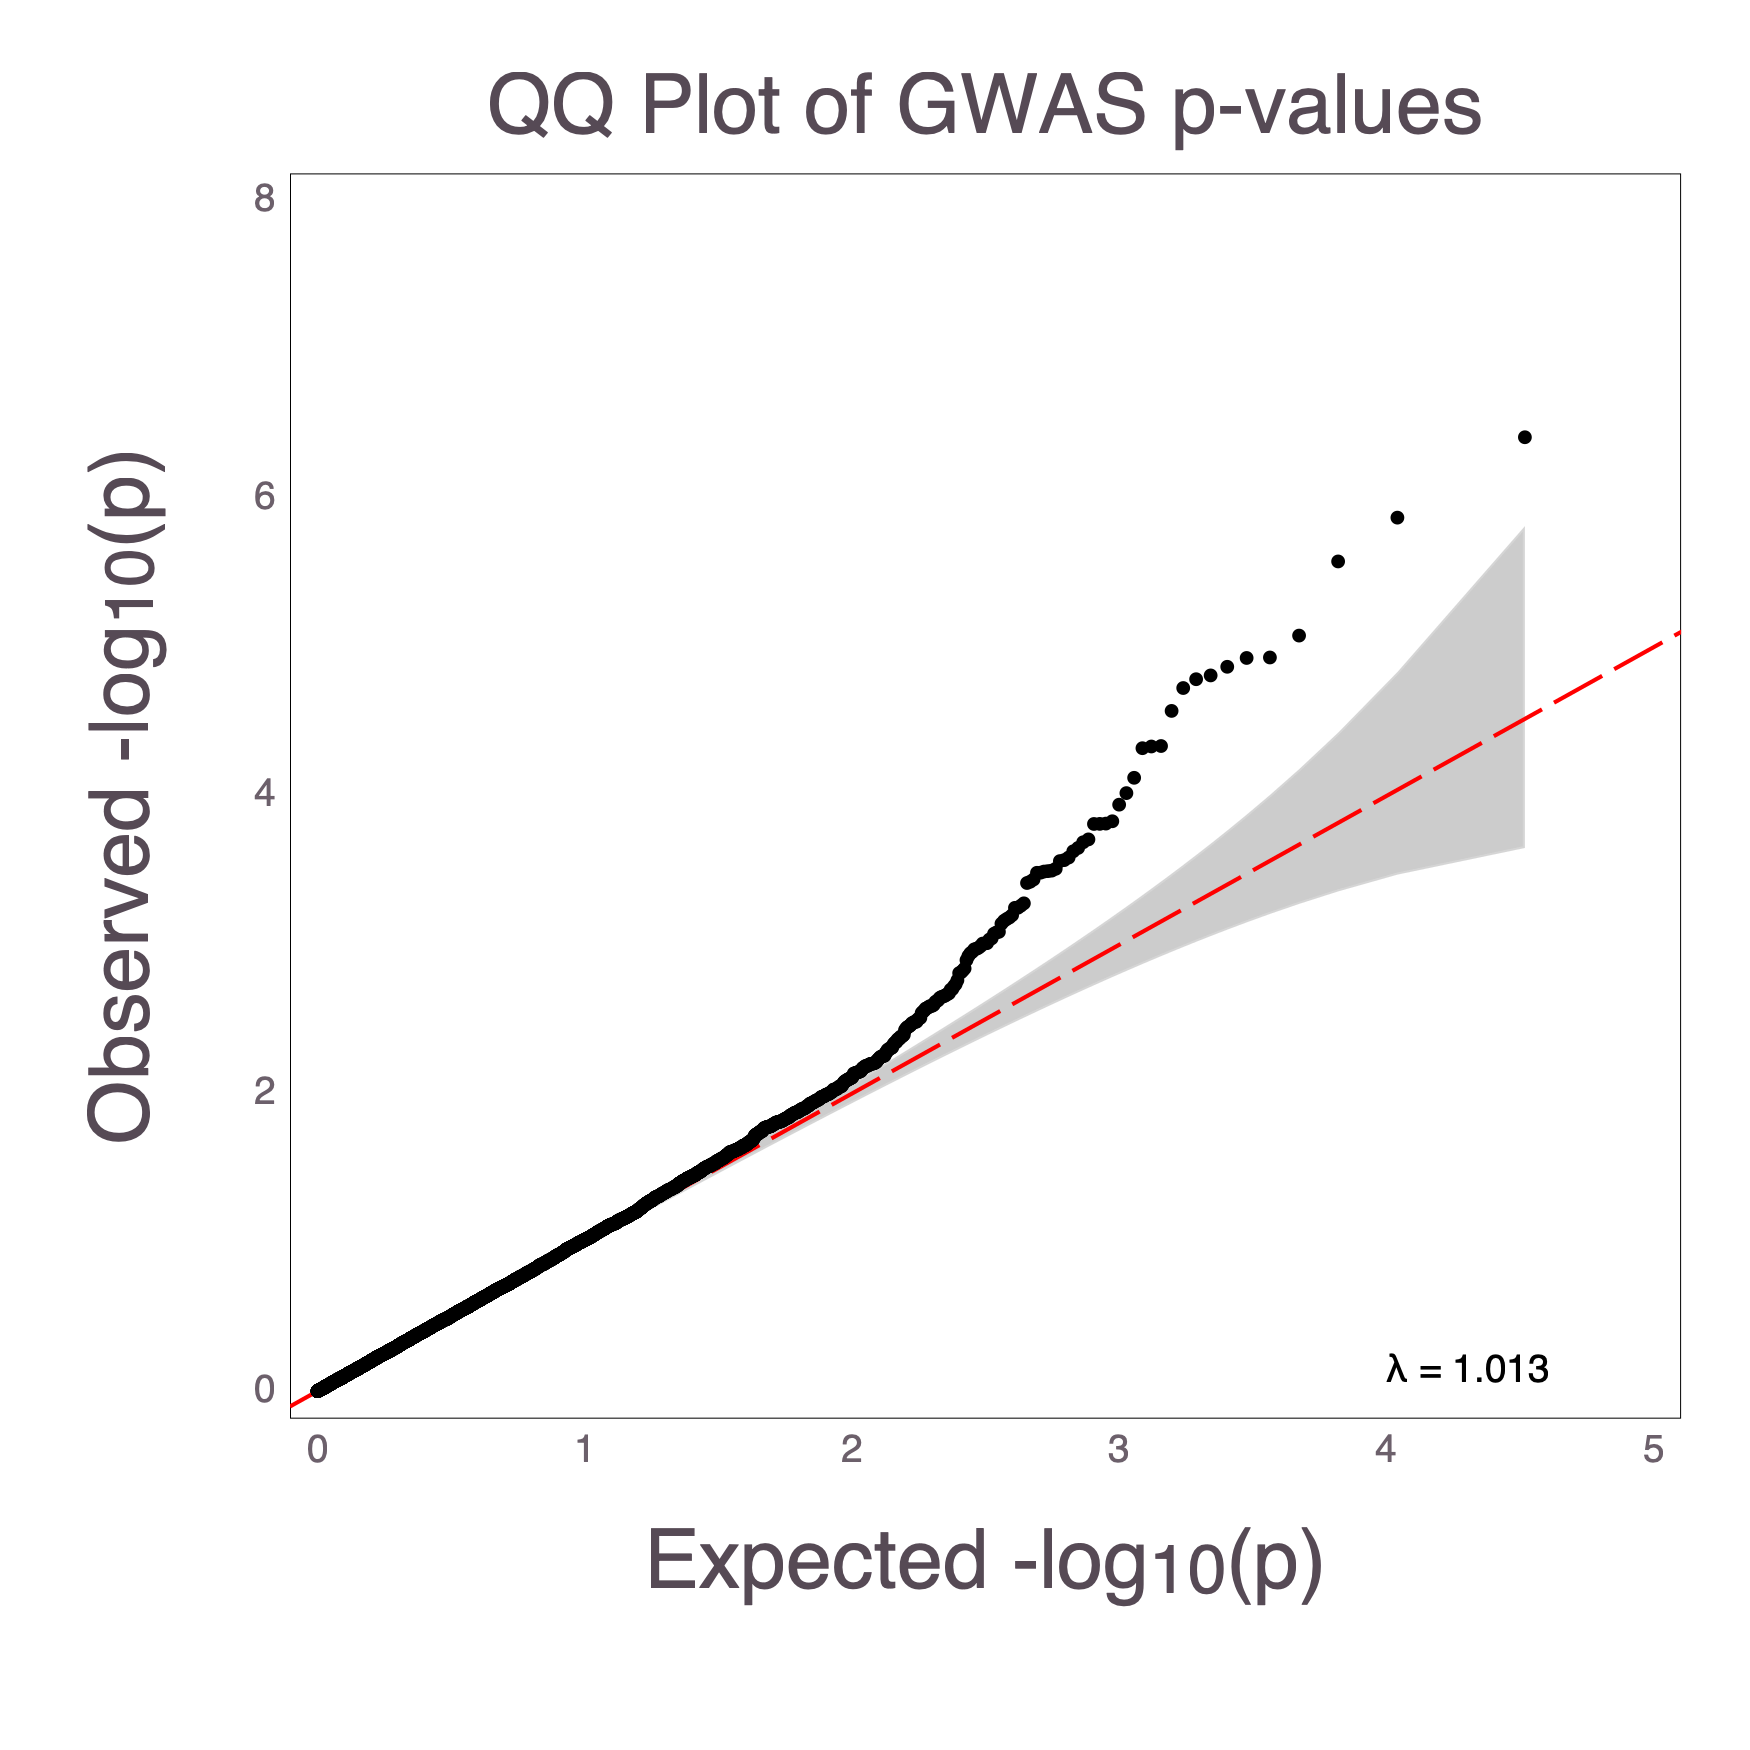

In [1]:
display("image/png", read("qqplot.png"))

For documentation of the `qq` function, type `?qq` in Julia REPL.
```@docs
qq
```

## Manhattan Plots

The following command creates a manhattan plot from the data

In [6]:
manhattan(df)

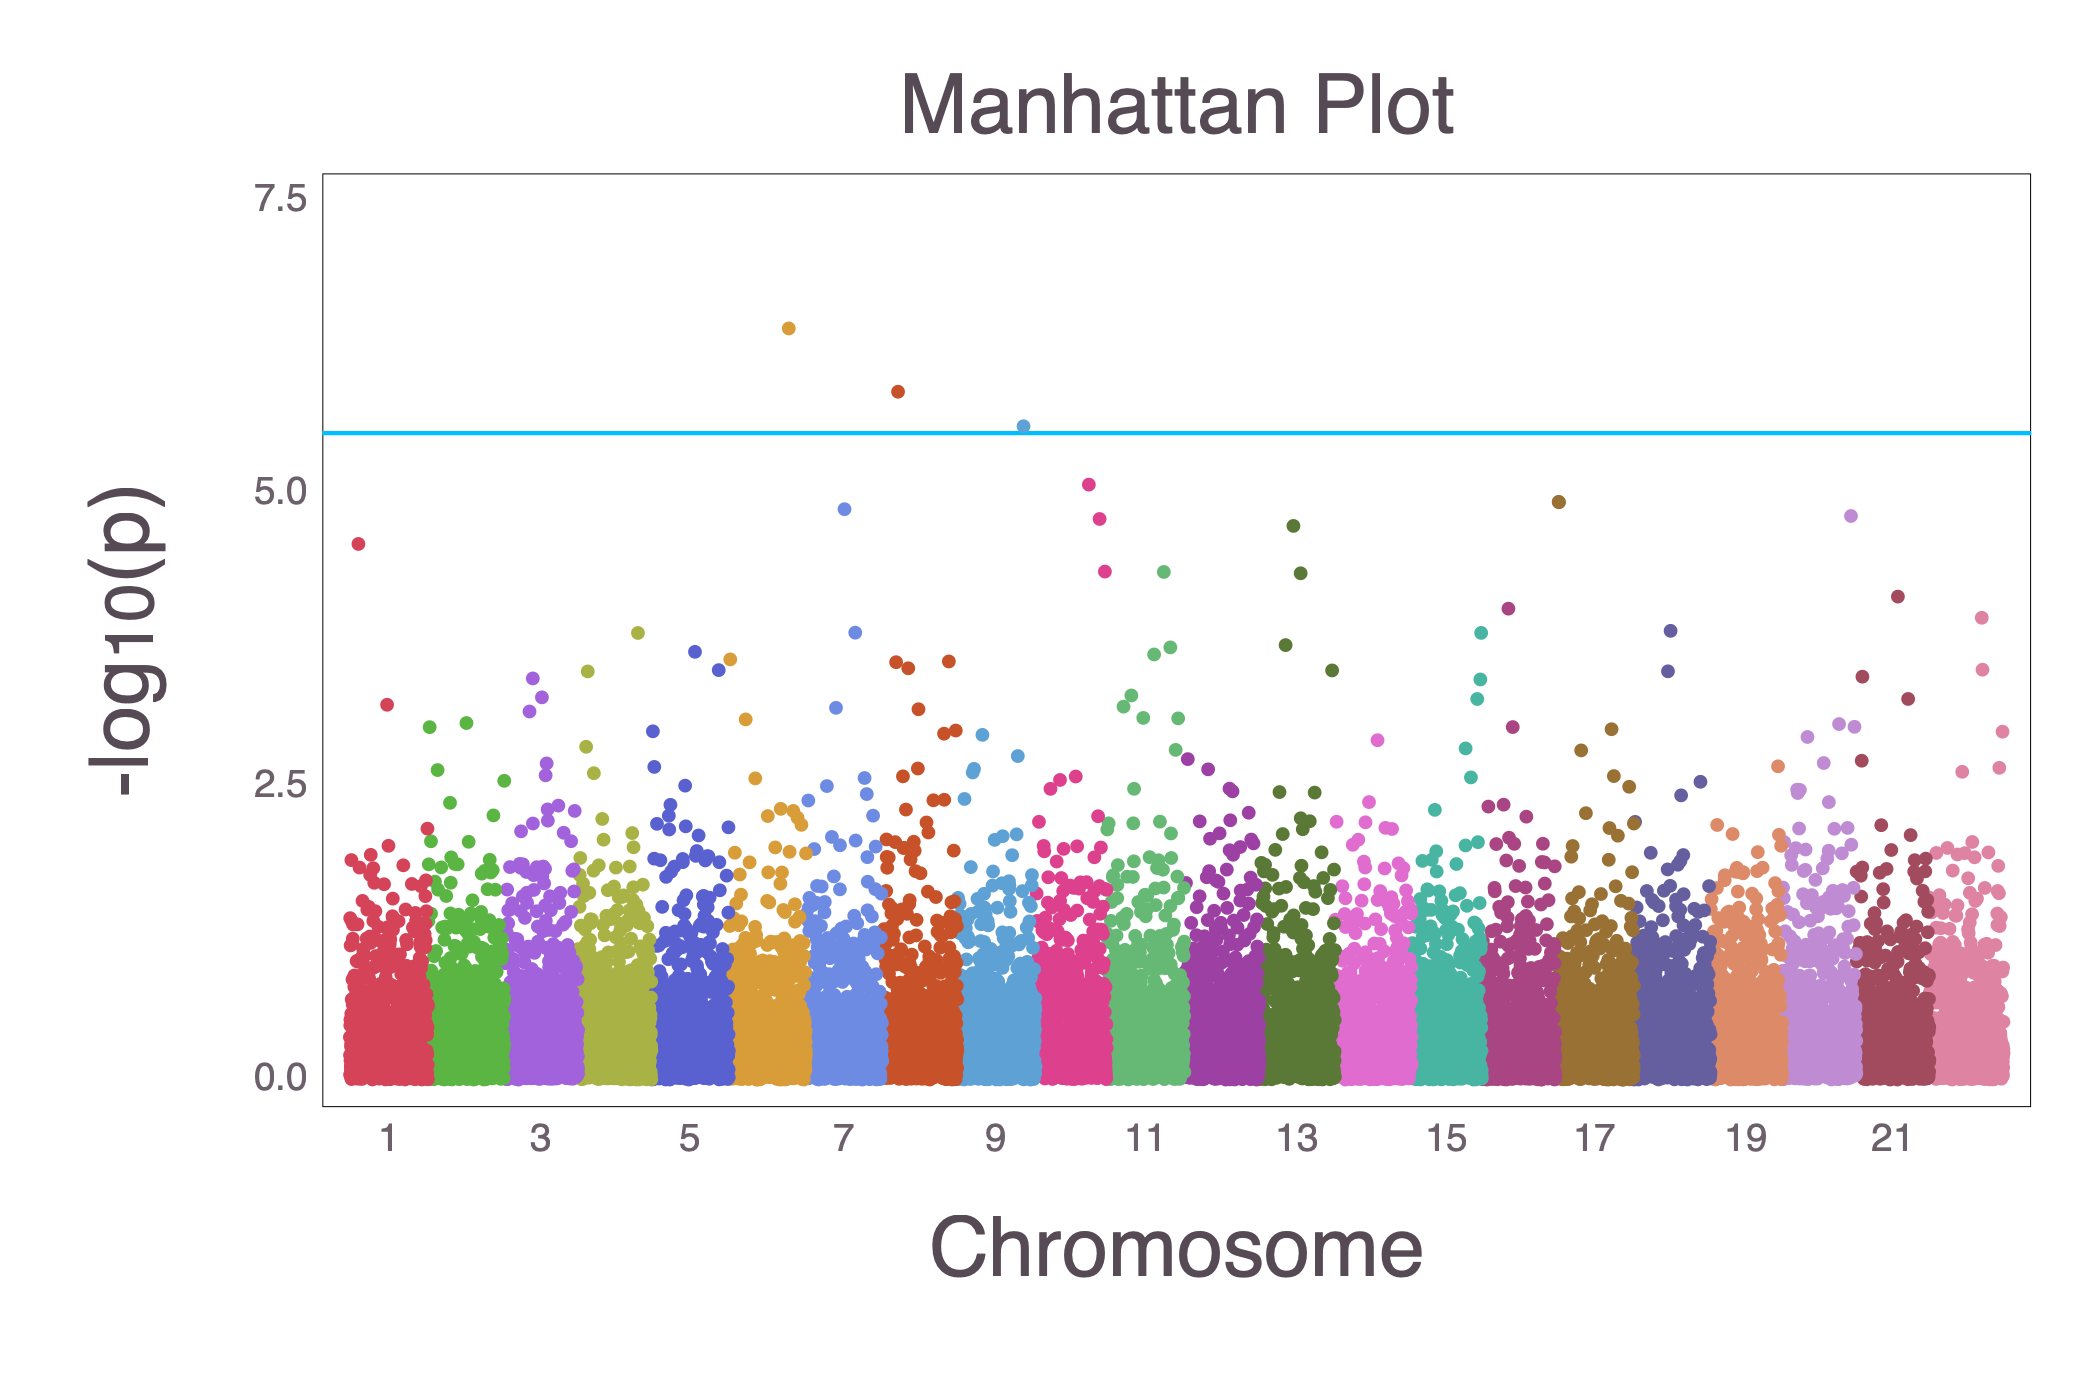

In [2]:
display("image/png", read("manhattan.png"))

For documentation of the `manhattan` function, type `?manhattan` in Julia REPL.
```@docs
manhattan
```

### Necessary Inputs

`qq` expects either an DataFrame object input or an array of pvalues as an input. If a DataFrame is the input, the pvalues must be stored under the name pval.  

`manhattan` expects either an DataFrame object input or an array of pvalues and an array of chromosome IDs as an input. If a DataFrame is the input, the pvalues must be stored under the name `pval`.  The chromosomes and pvalues must correspond in order to each other, and must be ordered in according to ascending basepairs. The chromosome variable must be named `chr`. Optionally, if you have basepair location information in your DataFrame, the position variable must be named `pos`, but the basepair position isn't required to create a plot. 

### Additional Options

There are several other options that the `qq` and `manhattan` functions take, refer to the specific documentation for each function via the `?` command to see the option names. Current options include arguments for qq line color, qq dot color, maximum x and y values, dpi, significance line y-value, significance line color, title, fontsize, and dataframe names of pvalues, chromosomes, and BP positions in your input dataframe. 

## Saving Files

`qq`, by default, outputs a .png named qqplot.png. Use the keyword argument 'outfile' to change the output file name. It will parse the output file name to ensure that the extension is compatible. Currently, we support .png, .pdf, and .svg files. 

`manhattan` by default, outputs a .png named manhattan.png. Use the keyword argument 'outfile' to change the output file name. It will parse the output file name to ensure that the extension is compatible. Currently, we support .png, .pdf, and .svg files. 

You can utilize more options to create a more customized plot. 

In [7]:
qq(df[:pval]; xlabel = "Expected", ylabel = "Observed", 
    titles = "", outfile = "testqq.png", dotcolor = "gray", 
    fontsize = 18pt, linecolor = "blue")

In [ ]:
display("image/png", read("testqq.png"))

In [ ]:
manhattan(df; pvalvar = "pval", chrvar = "chr", 
    posvar = "pos", outfile = "manhattan2.pdf", fontsize = 18pt, linecolor = "red")

In [ ]:
display("image/pdf", read("manhattan2.pdf"))